In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay


In [258]:
from sklearn.impute import KNNImputer
from sklearn import set_config
# Optionen setzen
set_config(transform_output="pandas")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [259]:
diabetes=pd.read_csv('../Dataset/diabetes.csv')


diabetes.head(8)

diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [151]:
# The values of "0" are replaced with NaN to be able to perform specific pandas functions
# Except in the Outcome. There 0 is a indicator of No. ALso except for Pregnancies. There 0 is valid value
#  So this columns should not be replaced
columns_to_replace = diabetes.columns.difference(['Outcome', "Pregnancies"])

diabetes_cleaned = diabetes.copy()
diabetes_cleaned[columns_to_replace] = diabetes_cleaned[columns_to_replace].replace(0, np.NaN)

diabetes_cleaned.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [152]:
def showMissingValues(diabetes_cleaned):
    print("Find columns with missing values:")
    missing_vals = [col for col in diabetes_cleaned if diabetes_cleaned[col].isnull().sum() > 0]
    for col in missing_vals:
        print(col, diabetes_cleaned[col].isnull().sum(), "missing values")


showMissingValues(diabetes_cleaned)

Find columns with missing values:
Glucose 5 missing values
BloodPressure 35 missing values
SkinThickness 227 missing values
Insulin 374 missing values
BMI 11 missing values


In [153]:
diabetes_cleaned['Glucose'].fillna(diabetes_cleaned['Glucose'].median(), inplace = True)

diabetes_cleaned['BloodPressure'].fillna(diabetes_cleaned['BloodPressure'].median(), inplace = True)

diabetes_cleaned['SkinThickness'].fillna(diabetes_cleaned['SkinThickness'].median(), inplace = True)

diabetes_cleaned['Insulin'].fillna(diabetes_cleaned['Insulin'].median(), inplace = True)

diabetes_cleaned['BMI'].fillna(diabetes_cleaned['BMI'].median(), inplace = True)


diabetes_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [154]:
# All features
X = diabetes_cleaned.drop('Outcome', axis=1)

# 3 Factores (features)
X_3 = diabetes_cleaned[['Glucose', 'BMI', 'Age']]

# 5 Factores (features)
X_5 = diabetes_cleaned[['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']]

# Target
y = diabetes_cleaned['Outcome']




In [155]:
# Evaluate Models
def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("-" * 30)


In [156]:
# Use ML Models

def run_models(X,y):
    # Train-test split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   
    
    # Initialize classifiers
    nb_model = GaussianNB()
    rf_model = RandomForestClassifier(random_state=42)
    dt_model = DecisionTreeClassifier(random_state=42)

    # Train models
    nb_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    dt_model.fit(X_train, y_train)

    # Predict classes
    nb_pred = nb_model.predict(X_test)
    rf_pred = rf_model.predict(X_test)
    dt_pred = dt_model.predict(X_test)
    
    # Display results
    evaluate_model("Naive Bayes", y_test, nb_pred)
    evaluate_model("Random Forest", y_test, rf_pred)
    evaluate_model("Decision Tree", y_test, dt_pred)

    # Plot all ROC curves in one plot
    plt.figure(figsize=(10, 8))
    for model, name in zip([nb_model, rf_model, dt_model], ["Naive Bayes", "Random Forest", "Decision Tree"]):
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

    plt.title('ROC Curves for Diabetes Classification')
    plt.legend()
    plt.show()


Naive Bayes Results:
Accuracy: 0.7403
Precision: 0.6190
Recall: 0.6500
F1 Score: 0.6341
AUC: 0.7190
Confusion Matrix:
[[119  32]
 [ 28  52]]
------------------------------
Random Forest Results:
Accuracy: 0.7489
Precision: 0.6310
Recall: 0.6625
F1 Score: 0.6463
AUC: 0.7286
Confusion Matrix:
[[120  31]
 [ 27  53]]
------------------------------
Decision Tree Results:
Accuracy: 0.6970
Precision: 0.5581
Recall: 0.6000
F1 Score: 0.5783
AUC: 0.6742
Confusion Matrix:
[[113  38]
 [ 32  48]]
------------------------------


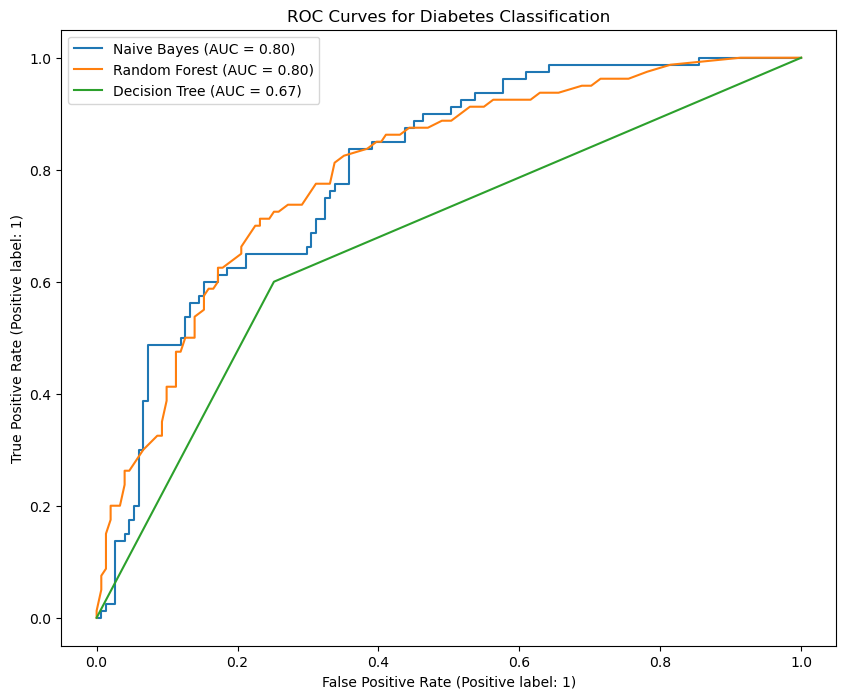

In [157]:
# Run Models with all features
run_models(X=X, y=y)

Naive Bayes Results:
Accuracy: 0.7273
Precision: 0.6104
Recall: 0.5875
F1 Score: 0.5987
AUC: 0.6944
Confusion Matrix:
[[121  30]
 [ 33  47]]
------------------------------
Random Forest Results:
Accuracy: 0.7143
Precision: 0.5854
Recall: 0.6000
F1 Score: 0.5926
AUC: 0.6874
Confusion Matrix:
[[117  34]
 [ 32  48]]
------------------------------
Decision Tree Results:
Accuracy: 0.6667
Precision: 0.5172
Recall: 0.5625
F1 Score: 0.5389
AUC: 0.6422
Confusion Matrix:
[[109  42]
 [ 35  45]]
------------------------------


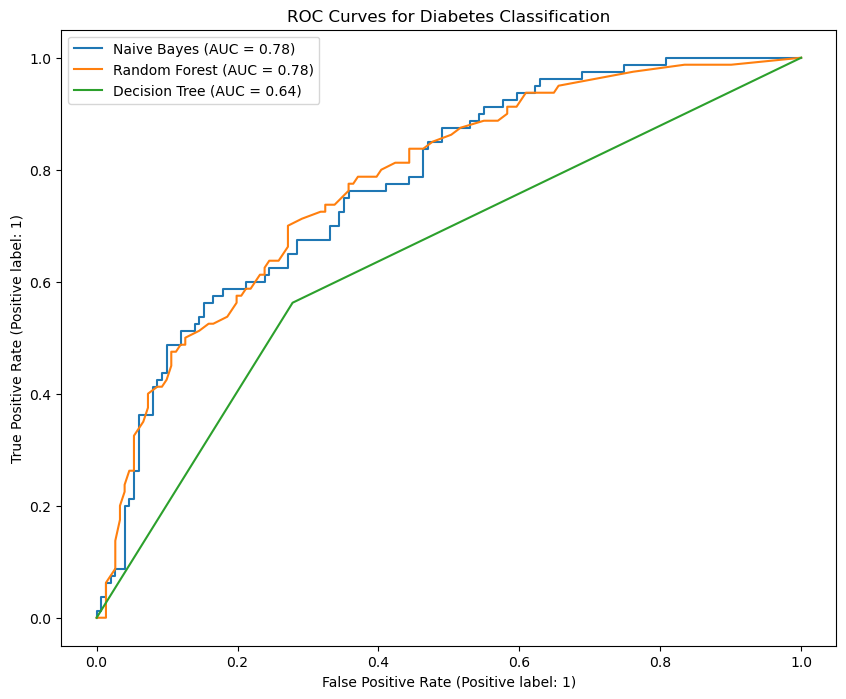

In [158]:
# Run Models with 3 Factors
run_models(X=X_3,y=y)

Naive Bayes Results:
Accuracy: 0.7359
Precision: 0.6267
Recall: 0.5875
F1 Score: 0.6065
AUC: 0.7010
Confusion Matrix:
[[123  28]
 [ 33  47]]
------------------------------
Random Forest Results:
Accuracy: 0.7229
Precision: 0.5909
Recall: 0.6500
F1 Score: 0.6190
AUC: 0.7058
Confusion Matrix:
[[115  36]
 [ 28  52]]
------------------------------
Decision Tree Results:
Accuracy: 0.6623
Precision: 0.5109
Recall: 0.5875
F1 Score: 0.5465
AUC: 0.6447
Confusion Matrix:
[[106  45]
 [ 33  47]]
------------------------------


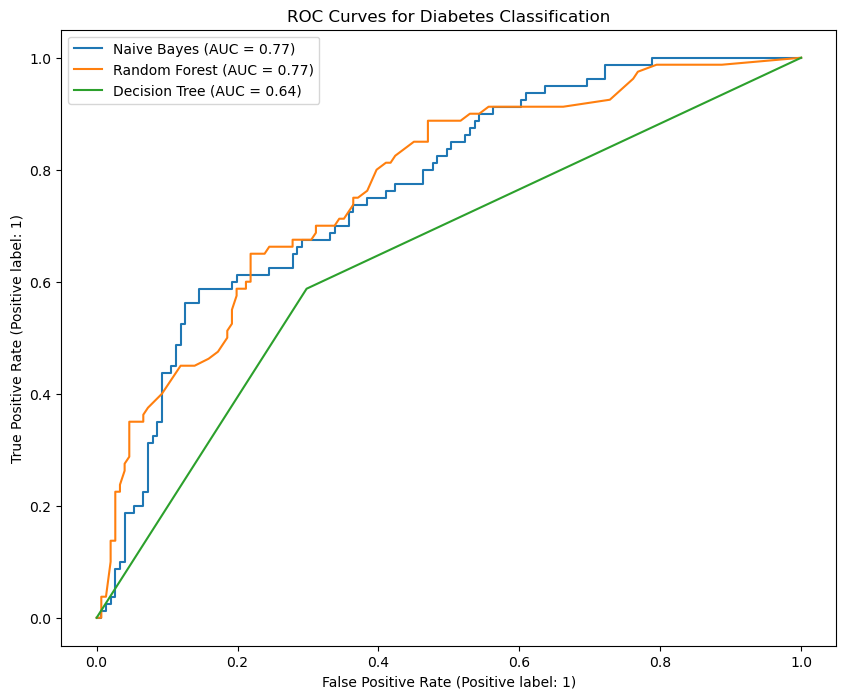

In [159]:
# Run Models with 5 Factors
run_models(X=X_5,y=y)

# Improvement

In [160]:
target = diabetes["Outcome"]

X_imp = diabetes.drop(["Outcome"],axis=1)

### Calculate Correlation with incorrect Values (using Spearman)

In [161]:
X_imp.corrwith(target,method="spearman").sort_values(ascending=False)

Glucose                     0.475776
BMI                         0.309707
Age                         0.309040
Pregnancies                 0.198689
DiabetesPedigreeFunction    0.175353
BloodPressure               0.142921
SkinThickness               0.089728
Insulin                     0.066472
dtype: float64

In [162]:
(X_imp["Insulin"]==0).sum()


374

Here, the correlation between insulin and the target is so little because there are many missing values

In [163]:
columns_to_replace = X_imp.columns.difference(['Outcome', "Pregnancies"])

diabetes_cleaned_imp = X_imp.copy()
diabetes_cleaned_imp[columns_to_replace] = diabetes_cleaned_imp[columns_to_replace].replace(0, np.NaN)


## Train Test Split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_cleaned_imp, target, test_size=0.3, random_state=0)

### Imputing with KNN Imputer instead of median and only on train data

In [165]:
imputer = KNNImputer()

In [166]:
imputer.fit(X_train)

KNNImputer()

In [167]:
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


Once again the correlation analysis

In [168]:
X_train_imputed.corrwith(target,method="spearman").sort_values(ascending=False)

Glucose                     0.498428
Insulin                     0.388871
Age                         0.328961
BMI                         0.322856
SkinThickness               0.252387
DiabetesPedigreeFunction    0.173740
Pregnancies                 0.157771
BloodPressure               0.145562
dtype: float64

SkinThickness und Insulin have after imputing a higher correlation with the target.

## Random Forest zur Feature Importance:

In [182]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed,y_train)

RandomForestClassifier(random_state=42)

In [183]:
cross_val_score(estimator= rf, X=X_train_imputed,y=y_train,cv=5).mean()

0.7523018345448251

In [171]:
Feature_Importance = pd.DataFrame(data= rf.feature_importances_, index= X_train_imputed.columns, columns=["Feature Importance"])

Feature_Importance.sort_values(["Feature Importance"],ascending=False)

,Feature Importance
Glucose,0.218957
Insulin,0.170375
BMI,0.138657
Age,0.128673
DiabetesPedigreeFunction,0.109757
SkinThickness,0.096418
BloodPressure,0.072079
Pregnancies,0.065084


These are the Feature Importances after with the random forrest classifier method.


## First Round with all Parameters

Here a grid search is done for obtaining the best parameter

In [172]:
param_grid_rf = {"n_estimators":[80,100,200],"max_depth":[3,5,10],"min_samples_split":[2,4]}

gsv_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf,cv=5,scoring="accuracy")

gsv_rf.fit(X_train_imputed,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [80, 100, 200]},
             scoring='accuracy')

In [173]:
gsv_rf.best_params_

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 80}

In [174]:
gsv_rf.best_estimator_

gsv_rf.best_score_

0.7597438560055383

Again a gridsearch for finding even better parameters:

In [175]:
param_grid_rf_2 = {"n_estimators":[60,70,80],"max_depth":[4,5,6,7],"min_samples_split":[2,3]}

gsv_rf_2 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf_2,cv=5,scoring="accuracy")

gsv_rf_2.fit(X_train_imputed,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7], 'min_samples_split': [2, 3],
                         'n_estimators': [60, 70, 80]},
             scoring='accuracy')

In [176]:
gsv_rf_2.best_params_

{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 60}

In [179]:
gsv_rf_2.best_estimator_

gsv_rf_2.best_score_

0.7634302526825891

Third round:

In [178]:
param_grid_rf_3 = {"n_estimators":[65,70,75],"max_depth":[7,8,9],"min_samples_split":[2]}

gsv_rf_3 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf_3,cv=5,scoring="accuracy")

gsv_rf_3.fit(X_train_imputed,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_split': [2],
                         'n_estimators': [65, 70, 75]},
             scoring='accuracy')

In [180]:
gsv_rf_3.best_params_

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 65}

In [181]:
gsv_rf_3.best_estimator_

gsv_rf_3.best_score_

0.7597265489788854

Save best model:

In [190]:
rf_best = gsv_rf_2.best_estimator_

## Random Forest with only 5 features 

In [191]:
X_train_5 = X_train_imputed.loc[:,["Glucose","BMI","Age","Insulin","SkinThickness"]]
X_test_5 = X_test_imputed.loc[:,["Glucose","BMI","Age","Insulin","SkinThickness"]]

In [192]:
rf_5 = RandomForestClassifier(random_state=42)

rf_5.fit(X_train_5,y_train)

cross_val_score(estimator= rf_5, X=X_train_5,y=y_train,cv=5).mean()

0.7355486327448943

## Gridsearch for Random Forest with 5 features

In [202]:
param_grid_rf5_1 = {"n_estimators":[80,100,200],"max_depth":[3,5,10],"min_samples_split":[2,4]}

gsv_rf5_1 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf5_1,cv=5,scoring="accuracy")

gsv_rf5_1.fit(X_train_5,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [80, 100, 200]},
             scoring='accuracy')

In [203]:
gsv_rf5_1.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}

In [204]:
gsv_rf5_1.best_score_

0.7672031844929041

Second Round

In [206]:
param_grid_rf5_2 = {"n_estimators":[150,200,250],"max_depth":[2,3,4],"min_samples_split":[3,4,5]}

gsv_rf5_2 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf5_2,cv=5,scoring="accuracy")

gsv_rf5_2.fit(X_train_5,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [3, 4, 5],
                         'n_estimators': [150, 200, 250]},
             scoring='accuracy')

In [207]:
gsv_rf5_2.best_params_

{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 200}

In [212]:
gsv_rf5_2.best_score_

0.77466251298027

Third Round

In [219]:
param_grid_rf5_3 = {"n_estimators":[150,175,200],"max_depth":[3,4,5],"min_samples_split":[3,4,5]}

gsv_rf5_3 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf5_3,cv=5,scoring="accuracy")

gsv_rf5_3.fit(X_train_5,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [3, 4, 5],
                         'n_estimators': [150, 175, 200]},
             scoring='accuracy')

In [220]:
gsv_rf5_3.best_params_

{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 175}

In [221]:
gsv_rf5_3.best_score_

0.7765316718587746

Here the third round got the best results. Therefore, the model is saved.

In [225]:
rf5_best = gsv_rf5_3.best_estimator_


## KNN Classifier

first the data has to be scaled

In [229]:
scaler_full = StandardScaler()

scaler_full.fit(X_train_imputed)

StandardScaler()

In [230]:
X_train_imputed_scaled = scaler_full.transform(X_train_imputed)
X_test_imputed_scaled = scaler_full.transform(X_test_imputed)

Now with the 5 features:

In [231]:
scaler_5 = StandardScaler()
scaler_5.fit(X_train_5)

StandardScaler()

In [238]:
X_train_5_scaled = scaler_5.transform(X_train_5)
X_test_5_scaled = scaler_5.transform(X_test_5)

#### KNN Model training with all features

In [239]:
knn_full = KNeighborsClassifier()

knn_full.fit(X_train_imputed_scaled,y_train)

KNeighborsClassifier()

In [240]:
cross_val_score(estimator= knn_full, X=X_train_imputed_scaled,y=y_train,cv=5).mean()

0.7243509865005192

#### KNN Model training with 5 features

In [242]:
knn_5 = KNeighborsClassifier()

knn_5.fit(X_train_5_scaled,y_train)

KNeighborsClassifier()

In [243]:
cross_val_score(estimator= knn_full, X=X_train_5_scaled,y=y_train,cv=5).mean()

0.7597265489788854

With 5 features a better result is obtained

In [244]:
param_grid_knn_1 = {"n_neighbors":[5,7,9],"weights":['uniform', 'distance'],"metric": ["euclidean", "manhattan", "minkowski"]}

gsv_knn_1 = GridSearchCV(estimator=knn_5,param_grid=param_grid_knn_1,cv=5,scoring="accuracy")

gsv_knn_1.fit(X_train_5_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [245]:
gsv_knn_1.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [246]:
gsv_knn_1.best_score_

0.7746798200069228

Second Round

In [247]:
param_grid_knn_2 = {"n_neighbors":[9,11,13],"weights":['uniform', 'distance'],"metric": ["euclidean", "manhattan", "minkowski"]}

gsv_knn_2 = GridSearchCV(estimator=knn_5,param_grid=param_grid_knn_2,cv=5,scoring="accuracy")

gsv_knn_2.fit(X_train_5_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [248]:
gsv_knn_2.best_params_

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}

In [249]:
gsv_knn_2.best_score_

0.7784181377639321

Third round

In [250]:
param_grid_knn_3 = {"n_neighbors":[13,15,17,19,21],"weights":['uniform', 'distance'],"metric": ["euclidean", "manhattan", "minkowski"]}

gsv_knn_3 = GridSearchCV(estimator=knn_5,param_grid=param_grid_knn_3,cv=5,scoring="accuracy")

gsv_knn_3.fit(X_train_5_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [255]:
gsv_knn_3.best_params_

{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}

In [251]:
gsv_knn_3.best_score_

0.7895292488750433

Fourth Round

In [252]:
param_grid_knn_4 = {"n_neighbors":[21,23,39,35,45,55,],"weights":['uniform', 'distance'],"metric": ["euclidean", "manhattan", "minkowski"]}

gsv_knn_4 = GridSearchCV(estimator=knn_5,param_grid=param_grid_knn_4,cv=5,scoring="accuracy")

gsv_knn_4.fit(X_train_5_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [21, 23, 39, 35, 45, 55],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [253]:
gsv_knn_4.best_params_

{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}

In [254]:
gsv_knn_4.best_score_

0.7895292488750433

Here the optimal parameters are found

In [256]:
knn_best = gsv_knn_4.best_estimator_

## Support Vector Machine

In [260]:
svc_full = SVC(random_state=42)

svc_full.fit(X_train_imputed_scaled,y_train)

SVC(random_state=42)

In [261]:
cross_val_score(estimator= svc_full, X=X_train_imputed_scaled,y=y_train,cv=5).mean()

0.7484942886812045

#### SVC Model training with 5 features

In [262]:
svc_5 = SVC(random_state=42)

svc_5.fit(X_train_5_scaled,y_train)

SVC(random_state=42)

In [263]:
cross_val_score(estimator= svc_5, X=X_train_5_scaled,y=y_train,cv=5).mean()

0.7689858082381447

The Support Vector Machine achives worse results using all features

Therefore, a gridsearch with 5 features is done:

In [266]:
param_grid_svc_1 = {"C": [0.1, 1, 10, 100],"kernel": ["linear", "rbf", "poly", "sigmoid"],"gamma": ["scale", "auto"],"degree": [2, 3, 4],
    "class_weight": [None, "balanced"]}

gsv_svc_1 = GridSearchCV(estimator=svc_5,param_grid=param_grid_svc_1,cv=5,scoring="accuracy")

gsv_svc_1.fit(X_train_5_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [267]:
gsv_svc_1.best_params_

{'C': 0.1,
 'class_weight': None,
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear'}

In [268]:
gsv_svc_1.best_score_

0.7764278296988578

Second Round

In [269]:
param_grid_svc_2 = {"C": [0.0001,0.001,0.01,0.1],"kernel": ["linear", "rbf", "poly", "sigmoid"],"gamma": ["scale", "auto"],"degree": [2, 3, 4],
    "class_weight": [None, "balanced"]}

gsv_svc_2= GridSearchCV(estimator=svc_5,param_grid=param_grid_svc_2,cv=5,scoring="accuracy")

gsv_svc_2.fit(X_train_5_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [270]:
gsv_svc_2.best_params_

{'C': 0.1,
 'class_weight': None,
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear'}

Here the best parameters are already found. Therefore we using model from round 2.

In [271]:
svc_best = gsv_svc_2.best_estimator_